In [ ]:
#%matplotlib notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.patches as mpatches
import matplotlib.cm as cm

In [2]:
# Read file with plotting information
plot_data_csv = "Output/Data_for_plotting.csv"

# Read data into Pandas data frames
plot_data_df = pd.read_csv(plot_data_csv)

In [3]:
# Add Totals for migrants
plot_data_df["Tot Migrant"] = plot_data_df.loc[:,"2005":"2017"].sum(axis=1)

# For amount indicators calculate a sum 
amt_ser = plot_data_df.loc[~plot_data_df["Indicator"].str.contains('%'), "2005.1":"2017.1"].\
    sum(axis=1)
# For percetange indicators calculate an average
per_ser = plot_data_df.loc[plot_data_df.Indicator.str.contains('%'), "2005.1":"2017.1"].\
    mean(axis=1)

# Add Totals for indicators
plot_data_df["Tot Indic"] = pd.concat([amt_ser,per_ser]).sort_index()

In [4]:
# Extract data for x-axis (Name of countries)
x_axis = plot_data_df.loc[plot_data_df["Indicator"] == "Personal remittances, received (current US$)"]["Origin"]
# Extract data for y-axis (Indicator: Personal remittances, received (current US$))
y_axis = plot_data_df.loc[plot_data_df["Indicator"] == "Personal remittances, received (current US$)"]["Tot Indic"]
# Extract data for 2nd y-axis (Indicator: "GDP (current US$)")
yGDP_axis = plot_data_df.loc[plot_data_df["Indicator"] == "GDP (current US$)"]["Tot Indic"]

# Extract data for labeling Remittances bar
bar_info = plot_data_df.loc[plot_data_df["Indicator"] == "Personal remittances, received (% of GDP)"]["Tot Indic"].\
    reset_index(drop=True)

In [5]:
#  CREATE FUNCTION List comprehension ****
bar_info_list = []

for i in bar_info:
    
    bar_info_list.append(round(i, 1))
    
bar_info_list = [str(i) + "%" for i in bar_info_list]
#bar_info_list

C:\Users\MEAGUILA\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


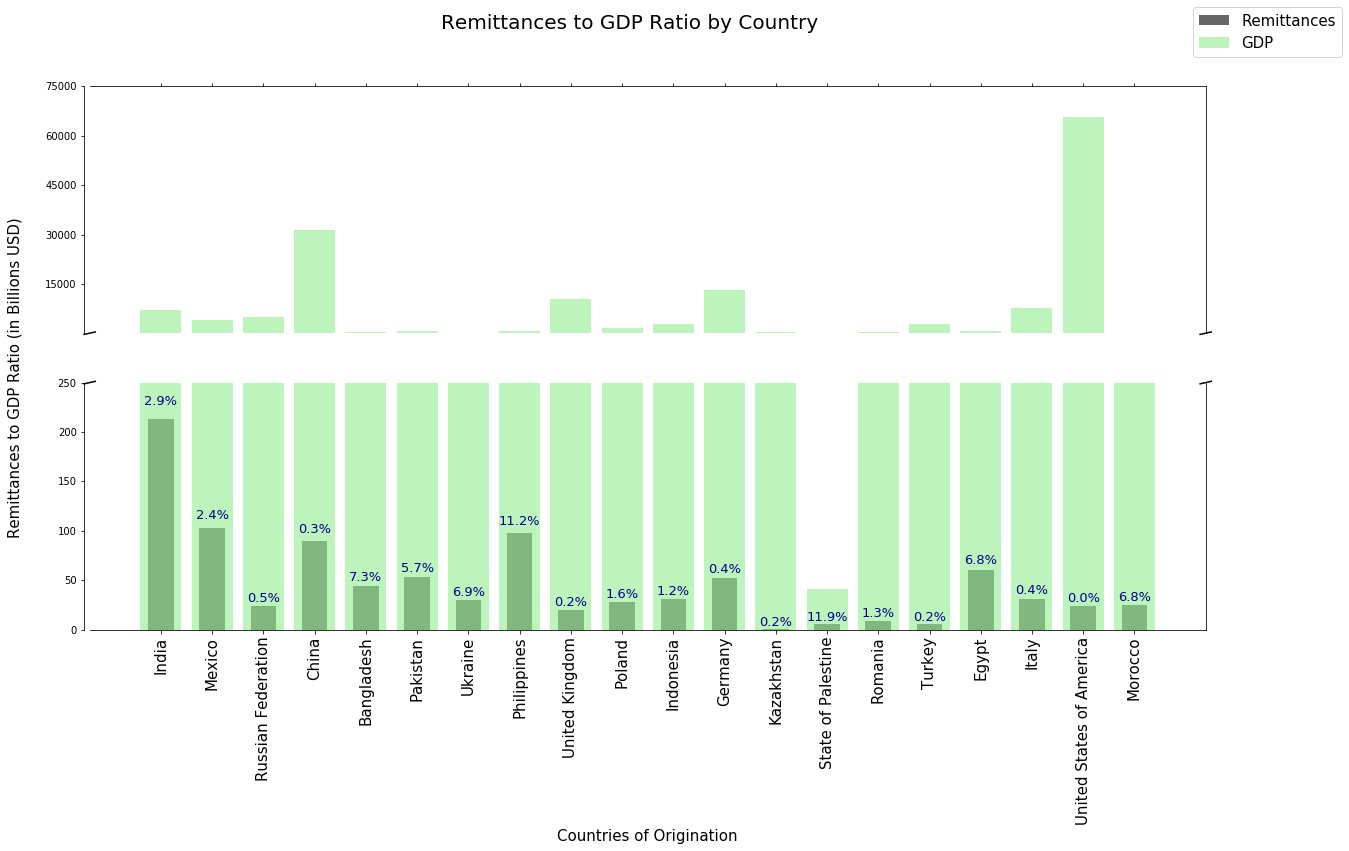

In [6]:
# Create a plotting area with 2 subplots that share the x-axis
fig1, (ax1, ax2) = plt.subplots(2, 1,figsize=(20,10), sharex=True)

# plot the same data on both plots
ax1.bar(x_axis, y_axis, color='black', alpha=0.6, align="center", width=0.5,label="Remittances")
rect_rem = ax2.bar(x_axis, y_axis, color='black', alpha=0.6, align="center", width=0.5,label="Remittances")
ax1.bar(x_axis, yGDP_axis, color='lightgreen', alpha=0.6, align="center",label="GDP")
rect_gdp = ax2.bar(x_axis, yGDP_axis, color='lightgreen', alpha=0.6, align="center",label="GDP")

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(250, 75000)  # GDP
ax1.yaxis.set_major_locator(MultipleLocator(15000))
ax2.set_ylim(0, 250)  # Remittances
ax2.yaxis.set_major_locator(MultipleLocator(50))

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax1.spines['left'].set_position(('outward', 6))
ax2.spines['left'].set_position(('outward', 6))
ax2.tick_params(axis='x', rotation=90, labelsize=15)

# Code to add diagonal  lines to plots
d = .005  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# Show percetange of Remittances on GDP on top of the Remittances bar 
i = 0
for rect in rect_rem:
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width()/2., 1.05*height, bar_info_list[i],\
             ha='center', va='bottom', color='darkblue', fontsize=13)
    i += 1

# Adding plot titles, axis tiles, legend, etc.
plt.text(-3,405,"Remittances to GDP Ratio (in Billions USD)",fontsize=15,rotation=90)
plt.xlabel("Countries of Origination",fontsize=15)
fig1.suptitle('Remittances to GDP Ratio by Country', fontsize=20)
fig1.legend(handles=[rect_rem,rect_gdp],loc=1, fontsize=15)

# Saving the chart and showing to screen
plt.savefig("Images/Rem_GDP_Ratio.png")
plt.show()

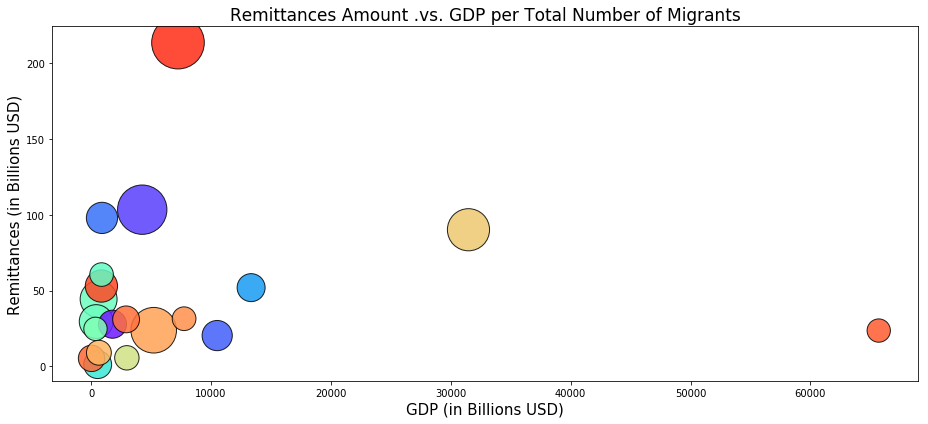

In [7]:
# We now introduce a new variable, the number of migrants
# Data for bubble
x_axis = plot_data_df.loc[plot_data_df["Indicator"] == "GDP (current US$)"]["Tot Indic"]
y_axis = plot_data_df.loc[plot_data_df["Indicator"] == "Personal remittances, received (current US$)"]["Tot Indic"]
z_axis = plot_data_df.loc[plot_data_df["Indicator"] == "GDP (current US$)"]["Tot Migrant"] 
labels = plot_data_df.loc[plot_data_df["Indicator"] == "GDP (current US$)"]["Origin"]
colors=cm.rainbow(np.random.rand(20))
    
# Example bubble
plt.figure(figsize=(13,6))
rur_hdl = plt.scatter(x_axis,y_axis, s=z_axis/20000, alpha=0.85, \
                      edgecolors="black", marker="o", c=colors, linewidths=1)
plt.title("Remittances Amount .vs. GDP per Total Number of Migrants", size=17) 
plt.xlabel("GDP (in Billions USD)", size=15) 
plt.ylabel("Remittances (in Billions USD)", size=15)

# Save to file and send to screen
plt.tight_layout()
plt.savefig("Images/RemVSGDPbubble.png")
plt.show()

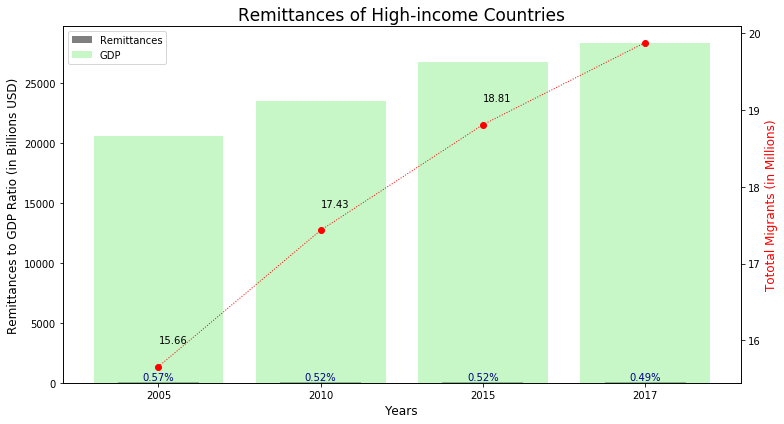

In [8]:
# CREATE FUNCTION to SEND ONLY the type of country we want
# personal remittances and number of migrants for Less eveloped countries for timed series
# Years
x_axis = plot_data_df.columns[3:7] 
# Total remittances
y_axis = plot_data_df.loc[(plot_data_df["Indicator"] == "Personal remittances, received (current US$)") &
                          (plot_data_df["Income Range"] == "High-income")].iloc[:,8:12].sum()
# Total GDP
y2_axis = plot_data_df.loc[(plot_data_df["Indicator"] == "GDP (current US$)") &
                          (plot_data_df["Income Range"] == "High-income")].iloc[:,8:12].sum()
# Total number of migrants
my_axis = plot_data_df.loc[(plot_data_df["Indicator"] == "GDP (current US$)") &
                          (plot_data_df["Income Range"] == "High-income")].iloc[:,3:7].sum() / 1000000
# Percentage of remittances on GDP
bar_info = plot_data_df.loc[(plot_data_df["Indicator"] == "Personal remittances, received (% of GDP)") & 
                           (plot_data_df["Income Range"] == "High-income")].iloc[:,8:12].\
    mean().reset_index(drop=True)

# ************ CREATE FUNCTION List comprehension ****
bar_info_list = []

for i in bar_info:
    
    bar_info_list.append(round(i, 1))
    
bar_info_list = [str(i) + "%" for i in bar_info_list]

# **************** CREATE FUNCTION List comprehension ****

# Create one plot
fig2, ax1 = plt.subplots(figsize=(11,6))

# Add one plot that shares the xAxis
ax3 = ax1.twinx()

# Chart as remittances and GDP as bars and total migrants as line
bar1_rem = ax1.bar(x_axis, y_axis, color='black', alpha=0.5, align="center", width=0.5,label="Remittances")
bar2_rem = ax1.bar(x_axis, y2_axis, color='lightgreen', alpha=0.5, align="center",label="GDP")
ax3.plot(x_axis, my_axis, linestyle=':', linewidth=1, marker="o", color="red")

# Show percetange of Remittances on GDP on top of the Remittances bar 
i = 0
for rect in bar1_rem:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2., 1.5*height, f"{bar_info[i]:.2f}%",\
#ax1.text(rect.get_x() + rect.get_width()/2., 1.5*height, bar_info_list[i],\             
             ha='center', va='bottom', color='darkblue')
    i += 1

# 
for i,j in zip(x_axis, my_axis):
    ax3.annotate(f"{j:.2f}",xy=(i,j+0.3))    
   

    
# Set axis labels, title, legends, etc.
ax1.set_xlabel('Years', size=12)
ax1.set_ylabel('Remittances to GDP Ratio (in Billions USD)', size=12)
ax3.set_ylabel('Tototal Migrants (in Millions)', color='r', size=12)
ax1.legend(handles=[bar1_rem,bar2_rem],loc='best')

plt.title("Remittances of High-income Countries", size=17)

# Save to file and send to screen
plt.tight_layout()
plt.savefig("Images/Rem_HighInc_Ctries.png")
plt.show()